# **Hospital City Data Anaylsis**

# Table of Contents

1. **[Data Understanding & Preprocessing (Part A)](#1-data-understanding--preprocessing-part-a)**
   * 1.1. Preparation
   * 1.2. Data Inspection
   * 1.3. Treating Missing Values and Duplicates
      * 1.3.1. Duplicates
      * 1.3.2. Missing Values
   * 1.4. Optimizing Datatypes
   * 1.5. Inconsistent Values and Outliers
      * 1.5.1. Logic Inconsistencies
      * 1.5.2. Outliers

2. **[Feature Engineering & ABT Construction (Part B)](#2-feature-engineering--abt-construction-part-b)**
   * 2.1. Demographic Variables
   * 2.2. Visit Aggregated Behavior Variables
   * 2.3. Clinical Service Usage Variables
   * 2.4. Engagement Variables

## 1. Data Understanding And Preprocessing (Part A)

### 1.1 Preparation

In [505]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [506]:
patient_data=pd.read_excel('Project Data.xlsx')

In [507]:
patient_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


#### Fixing the index 

In [508]:
patient_data=patient_data.set_index('Patient ID')


In [509]:
patient_data.head()

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
Patient ID,,,,,,,,,,,,,,,
1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


### 1.2 Data Inspection

In [510]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10008 entries, 1482 to 1012
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        9952 non-null   float64       
 1   Gender                     10008 non-null  object        
 2   City of Residence          10008 non-null  object        
 3   Profession                 10008 non-null  object        
 4   Insurance Provider         8098 non-null   object        
 5   Family History             8015 non-null   object        
 6   Education Level            9979 non-null   object        
 7   Marital Status             10008 non-null  object        
 8   Visit Date                 10008 non-null  datetime64[ns]
 9   Department                 10008 non-null  object        
 10  Consultation Duration      10008 non-null  int64         
 11  Satisfaction Level         10008 non-null  int64         
 12  Approxi

We have **8 categorical variables**:  
`Gender`, `City of Residence`, `Profession`, `Insurance Provider`, `Family History`, `Education Level`, `Marital Status`, and `Department`.

We also have **6 numerical variables**:  
`Age`, `Consultation Duration`, `Satisfaction Level`, `Approximate Annual Income`, `Consultation Price`, and `Insurance Coverage`.

Additionally, there is **1 datetime variable**:  
`Visit Date`.


In [511]:
patient_data.describe(include='all') #temos de tratar do range da idade

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,9952.000000,10008,10008,10008,8098,8015,9979,10008,10008,10008,10008.000000,10008.000000,9.854000e+03,10008.000000,9958.000000
unique,NaN,3,8,10,4,4,8,4,NaN,13,NaN,NaN,NaN,NaN,NaN
top,NaN,Other,Birmingham,Retired,Provider D,Heart Disease,Undergraduate,Divorced,NaN,Psychiatry,NaN,NaN,NaN,NaN,NaN
freq,NaN,3417,1473,3601,2165,2235,4160,2893,NaN,1361,NaN,NaN,NaN,NaN,NaN
mean,50.635651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-31 14:53:14.244604160,NaN,67.807654,3.202338,4.340276e+04,187.263022,115.429366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 00:00:00,NaN,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-15 00:00:00,NaN,41.000000,2.000000,3.115775e+04,111.316562,59.692518
50%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-31 00:00:00,NaN,68.000000,3.000000,4.087650e+04,159.531115,115.938998
75%,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-16 00:00:00,NaN,94.000000,5.000000,5.072175e+04,199.820999,165.437958
max,195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 00:00:00,NaN,600.000000,6.000000,1.197090e+07,39999.222018,421.887836


In [512]:
patient_data.columns

Index(['Age', 'Gender', 'City of Residence', 'Profession',
       'Insurance Provider', 'Family History', 'Education Level',
       'Marital Status', 'Visit Date', 'Department', 'Consultation Duration',
       'Satisfaction Level', 'Approximate Annual Income', 'Consultation Price',
       'Insurance Coverage'],
      dtype='object')

### 1.3 Treating Missing Values and Duplicates

#### 1.3.1 Duplicates

We first inspected the dataset shape and then removed duplicated rows:

In [513]:
patient_data.shape

(10008, 15)

In [514]:
patient_data = patient_data.drop_duplicates()
print("After removing duplicates:", patient_data.shape)

After removing duplicates: (10000, 15)


After removal, the dataset went from 10,008 to 10,000 rows, meaning 8 duplicates were found and removed.

#### 1.3.2 Missing Values

In [515]:
patient_data.isnull().sum()

Age                            56
Gender                          0
City of Residence               0
Profession                      0
Insurance Provider           1907
Family History               1990
Education Level                29
Marital Status                  0
Visit Date                      0
Department                      0
Consultation Duration           0
Satisfaction Level              0
Approximate Annual Income     154
Consultation Price              0
Insurance Coverage             49
dtype: int64

From the missing value check, only a few features contain null entries:

- **Age**: 56  
- **Insurance Provider** : 1907  
- **Family History**: 1990  
- **Education Level**: 29  
- **Approximate Annual Income**: 154  
- **Insurance Coverage**: 49  

All remaining variables have complete data.


##### Filling Missing Data by Patient History

We used the patient's ID to fill in missing information. If a patient had data recorded in one visit (like their profession or family history), we copied that information to their other visits where it was missing.

In [516]:
# Patient specific
pat_missingcols = [
    'Age','Insurance Provider', 'Family History', 'Education Level','Approximate Annual Income',
]

# Visit-level numeric fields
visit_num = ['Insurance Coverage']

In [517]:
patient_data[pat_missingcols] = patient_data.groupby('Patient ID')[pat_missingcols].transform(
    lambda x: x.ffill().bfill())

C:\Users\almad\AppData\Local\Temp\ipykernel_26412\3173530074.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.ffill().bfill())


In [518]:
patient_data.isnull().sum()

Age                             0
Gender                          0
City of Residence               0
Profession                      0
Insurance Provider           1857
Family History               1990
Education Level                 0
Marital Status                  0
Visit Date                      0
Department                      0
Consultation Duration           0
Satisfaction Level              0
Approximate Annual Income       0
Consultation Price              0
Insurance Coverage             49
dtype: int64

##### Filling Insurance Data

Missing values in `Insurance Coverage` were filled using the median value within each department. This approach makes sense because consultation prices and reimbursement levels differ across specialties, meaning coverage patterns are not uniform hospital-wide. Using department-specific medians preserves realistic financial behavior for each type of service while avoiding distortions from outliers.


In [519]:
for col in visit_num:
    patient_data[col] = patient_data.groupby('Department')[col].transform(
        lambda x: x.fillna(x.median()))

In [520]:
patient_data.isnull().sum()

Age                             0
Gender                          0
City of Residence               0
Profession                      0
Insurance Provider           1857
Family History               1990
Education Level                 0
Marital Status                  0
Visit Date                      0
Department                      0
Consultation Duration           0
Satisfaction Level              0
Approximate Annual Income       0
Consultation Price              0
Insurance Coverage              0
dtype: int64

Checking that there are no categories of `No Provider` and `No Disease` in the Variables above

In [521]:
print(patient_data['Insurance Provider'].value_counts())
print('--------')
print(patient_data['Family History'].value_counts())

Insurance Provider
Provider D    2174
Provider A    2013
Provider B    2006
Provider C    1950
Name: count, dtype: int64
--------
Family History
Heart Disease    2234
Hypertension     2047
Diabetes         1866
Cancer           1863
Name: count, dtype: int64


We filled the remaining missing `Insurance Provider` values (1,857 rows) in two simple steps:

1. **No Coverage:** If the `Insurance Coverage` was 0, we set the provider to **'No Provider'**.
2. **Most Common:** For everyone else (where coverage was > 0), we filled the missing provider with the most common one in the dataset (**Mode**).

In [522]:

missing_provider = patient_data[patient_data['Insurance Provider'].isna()]
missing_provider[missing_provider['Insurance Coverage'] == 0].shape[0]



1795

In [523]:
patient_data.loc[
    (patient_data['Insurance Provider'].isna()) &
    (patient_data['Insurance Coverage'] == 0),
    'Insurance Provider'
] = 'No provider'

In [524]:
insurance_mode=patient_data['Insurance Provider'].mode()[0]

In [525]:
patient_data['Insurance Provider'].fillna(insurance_mode, inplace=True)

C:\Users\almad\AppData\Local\Temp\ipykernel_26412\585932245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patient_data['Insurance Provider'].fillna(insurance_mode, inplace=True)


In [526]:
patient_data.isna().sum()

Age                             0
Gender                          0
City of Residence               0
Profession                      0
Insurance Provider              0
Family History               1990
Education Level                 0
Marital Status                  0
Visit Date                      0
Department                      0
Consultation Duration           0
Satisfaction Level              0
Approximate Annual Income       0
Consultation Price              0
Insurance Coverage              0
dtype: int64

Filling the remaining Missing Values in `Family History `.

Since the dataset initially had no category for patients with *no* family history of disease, and we had already used the patient's past records to fill in known diseases, we assumed the remaining missing values indicated no history.

Therefore, we filled these remaining blanks with a new category called **'No Disease'**.

In [527]:
patient_data['Family History'].fillna('No Disease', inplace=True)
patient_data.isnull().sum()

C:\Users\almad\AppData\Local\Temp\ipykernel_26412\2582766118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  patient_data['Family History'].fillna('No Disease', inplace=True)


Age                          0
Gender                       0
City of Residence            0
Profession                   0
Insurance Provider           0
Family History               0
Education Level              0
Marital Status               0
Visit Date                   0
Department                   0
Consultation Duration        0
Satisfaction Level           0
Approximate Annual Income    0
Consultation Price           0
Insurance Coverage           0
dtype: int64

In [528]:
print(patient_data['Insurance Provider'].value_counts())
print('--------')
print(patient_data['Family History'].value_counts())

Insurance Provider
Provider D     2236
Provider A     2013
Provider B     2006
Provider C     1950
No provider    1795
Name: count, dtype: int64
--------
Family History
Heart Disease    2234
Hypertension     2047
No Disease       1990
Diabetes         1866
Cancer           1863
Name: count, dtype: int64


After applying the patient-level history imputation, the logic-based filling for insurance, and the new category creation for family history, we have successfully addressed all missing data.

### 1.4 Optmizing datatypes

In [529]:
patient_data['Visit Date'] = pd.to_datetime(patient_data['Visit Date'])
category_cols = [
    'Gender', 'City of Residence', 'Profession',
       'Insurance Provider', 'Family History', 'Education Level',
       'Marital Status', 'Department'
]
patient_data[category_cols] = patient_data[category_cols].astype("category")

patient_data['Age'] = patient_data['Age'].astype('int16')
patient_data['Consultation Duration'] = patient_data['Consultation Duration'].astype('int16')
patient_data['Satisfaction Level'] = patient_data['Satisfaction Level'].astype("int8")
patient_data['Approximate Annual Income'] = patient_data['Approximate Annual Income'].astype("float32")
patient_data['Consultation Price'] = patient_data['Consultation Price'].astype("float32")
patient_data['Insurance Coverage'] = patient_data['Insurance Coverage'].astype("float32")

patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1482 to 1012
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        10000 non-null  int16         
 1   Gender                     10000 non-null  category      
 2   City of Residence          10000 non-null  category      
 3   Profession                 10000 non-null  category      
 4   Insurance Provider         10000 non-null  category      
 5   Family History             10000 non-null  category      
 6   Education Level            10000 non-null  category      
 7   Marital Status             10000 non-null  category      
 8   Visit Date                 10000 non-null  datetime64[ns]
 9   Department                 10000 non-null  category      
 10  Consultation Duration      10000 non-null  int16         
 11  Satisfaction Level         10000 non-null  int8          
 12  Approxi

**Final Data Types Overview**

After optimization, the dataset consists of:

* 3 *Integer* variables: `Age`, `Satisfaction Level`, `Consultation Duration`
* 3 *Float* variables: `Approximate Annual Income`, `Consultation Price`, `Insurance Coverage`
* 8 *Categorical* variables: `Gender`, `City of Residence`, `Profession`, `Insurance Provider`, `Family History`, `Education Level`, `Marital Status`, `Department`
* 1 *Datetime* variable: `Visit Date`

### 1.5 Inconsistent values and Outliers

In [530]:
patient_data.describe(include='all')

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,10000.00000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
unique,NaN,3,8,10,5,5,8,4,NaN,13,NaN,NaN,NaN,NaN,NaN
top,NaN,Other,Birmingham,Retired,Provider D,Heart Disease,Undergraduate,Divorced,NaN,Psychiatry,NaN,NaN,NaN,NaN,NaN
freq,NaN,3415,1472,3598,2236,2234,4186,2892,NaN,1359,NaN,NaN,NaN,NaN,NaN
mean,50.63170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-31 14:18:31.680000,NaN,67.798400,3.202700,4.328476e+04,187.269928,115.586746
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 00:00:00,NaN,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,23.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-15 00:00:00,NaN,41.000000,2.000000,3.116075e+04,111.287243,59.870992
50%,52.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-31 00:00:00,NaN,68.000000,3.000000,4.089050e+04,159.531113,116.213352
75%,75.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-16 00:00:00,NaN,94.000000,5.000000,5.072125e+04,199.820995,165.880856
max,195.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-30 00:00:00,NaN,600.000000,6.000000,1.197090e+07,39999.222656,421.887848


#### 1.5.1 Logic Inconsistencies

##### Inconsistencies in `Age`



In [531]:
patient_data['Age'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 118, 138, 142, 158, 195],
      dtype=int16)

In [532]:

age_stats = patient_data.groupby("Education Level")["Age"].agg(["min", "max", "median"]).sort_values(by="median") #shows that educational level is consistent when speaking of ages

print(age_stats) #Groups ages by Education Level.


                           min  max  median
Education Level                            
Pre-school                   0    4     1.0
Kindergarten                 5    6     5.0
Elementary school            7   10    10.0
Middle school/junior high   11   13    12.0
High school                 14  118    17.0
PhD                         31   40    34.0
Master                      23  195    62.0
Undergraduate               19  158    63.0


C:\Users\almad\AppData\Local\Temp\ipykernel_26412\2335494928.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = patient_data.groupby("Education Level")["Age"].agg(["min", "max", "median"]).sort_values(by="median") #shows that educational level is consistent when speaking of ages


In [533]:
med_age_by_edu = patient_data.groupby("Education Level")["Age"].median()

# 2. Create mask for unrealistic ages
unrealistic_age = (patient_data['Age'] < 0) | (patient_data['Age'] > 100)

# 3. Replace unrealistic ages with median of their Education Level
patient_data.loc[unrealistic_age, 'Age'] = (
    patient_data.loc[unrealistic_age, 'Education Level'].map(med_age_by_edu)
)

# Optional: Check how many were replaced
print(f"Replaced {unrealistic_age.sum()} unrealistic ages.")
print(patient_data.loc[unrealistic_age, ['Education Level', 'Age']].head())
patient_data['Age'].sort_values().unique()


Replaced 103 unrealistic ages.
           Education Level  Age
Patient ID                     
1319                Master   62
1319                Master   62
1319                Master   62
1319                Master   62
1319                Master   62


C:\Users\almad\AppData\Local\Temp\ipykernel_26412\2962492207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_age_by_edu = patient_data.groupby("Education Level")["Age"].median()


array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int16)


We identified unrealistic ages as values greater than 100. To correct these, we analyzed `Education Level` and confirmed it aligns with expected age ranges. For every row with an unrealistic age, we replaced the value with the median age of its corresponding Education Level. This approach corrected 103 records, ensuring age values are consistent with educational context.


##### Inconcistencies in `Profession`


In [534]:
patient_data['Profession'].sort_values().unique()

['Artist', 'Businessperson', 'Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Retired', 'Scientist', 'Student', 'Teacher']
Categories (10, object): ['Artist', 'Businessperson', 'Doctor', 'Engineer', ..., 'Retired', 'Scientist', 'Student', 'Teacher']

Checking all the ages of `Retired` people 

In [535]:
# Check if any retired person is younger than 65
retired = patient_data[
    (patient_data['Profession'].str.lower() == "retired")]

retired['Age'].sort_values().unique()



array([  4,  11,  62,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
      dtype=int16)

During our analysis, we identified logical inconsistencies where patients with *childhood ages* (specifically examples like 4 and 11 years old) were incorrectly listed with the profession `'Retired'`.

We decided to investigate the Profession variable specifically for patients *under the age* of 18 to identify potential inconsistencies. 

In [536]:
under4_professions = patient_data.loc[(patient_data['Age'] < 18),
    'Profession'
]

under4_professions.value_counts()

Profession
Student           1933
Teacher             35
Retired             29
Lawyer              25
Doctor              20
Artist               0
Businessperson       0
Engineer             0
Nurse                0
Scientist            0
Name: count, dtype: int64

While "Student" is the expected profession for this age group, the presence of professions such as Teacher, Retired, Lawyer, and Doctor suggests data entry errors that may need addressing.

In [537]:
# Make sure Profession is editable (convert from category if necessary)
patient_data['Profession'] = patient_data['Profession'].astype('object')
# 2. Ages 5–18 → "Student"
patient_data.loc[(patient_data['Age'] < 18), 'Profession'] = 'Student'

In [538]:
patient_data['Profession'] = patient_data['Profession'].astype('category')


In [539]:
# Check if any retired person is younger than 65
retired = patient_data[
    (patient_data['Profession'].str.lower() == "retired")]

retired['Age'].sort_values().unique()

array([ 62,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int16)

Correction of `Profession` Variable

To address the inconsistencies found, we applied a logic-based correction to the Profession variable for all patients aged under 18 to have profession as `'Student'`.

This step automatically corrected the erroneous entries where underage patients were listed with adult professions.

##### Inconsistencies in  `Marital Status`

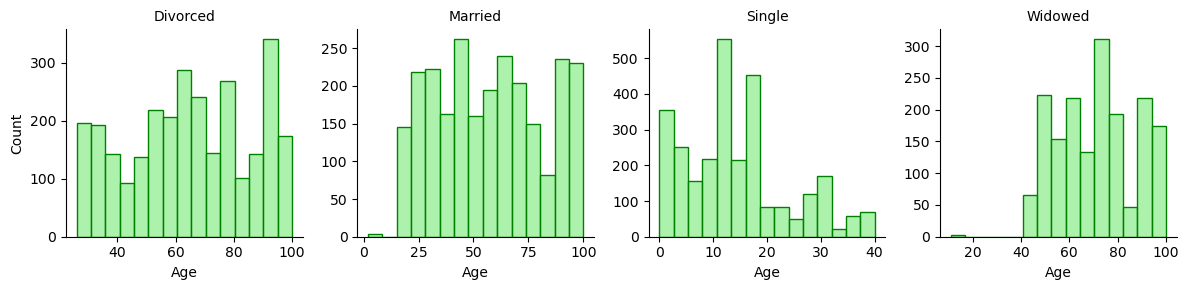

In [540]:
g = sns.FacetGrid(patient_data, col="Marital Status", col_wrap=4, height=3, sharex=False, sharey=False)

# Map a histogram to each subplot
g.map(sns.histplot, "Age", bins=15, color='lightgreen', edgecolor='green')

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Count")

plt.tight_layout()
plt.show()

In [541]:
underage_patients = patient_data[(patient_data['Age'] < 18)]

print(underage_patients['Marital Status'].value_counts())

Marital Status
Single      2037
Married        3
Widowed        2
Divorced       0
Name: count, dtype: int64


In [542]:
# Convert Marital Status to object type to allow modification
patient_data['Marital Status'] = patient_data['Marital Status'].astype('object')

# Set Marital Status to 'Single' for all patients under 18
patient_data.loc[patient_data['Age'] < 18, 'Marital Status'] = 'Single'

# Convert back to category
patient_data['Marital Status'] = patient_data['Marital Status'].astype('category')

In [543]:
underage_patients = patient_data[(patient_data['Age'] < 18)]
print(underage_patients['Marital Status'].value_counts())

Marital Status
Single      2042
Divorced       0
Married        0
Widowed        0
Name: count, dtype: int64


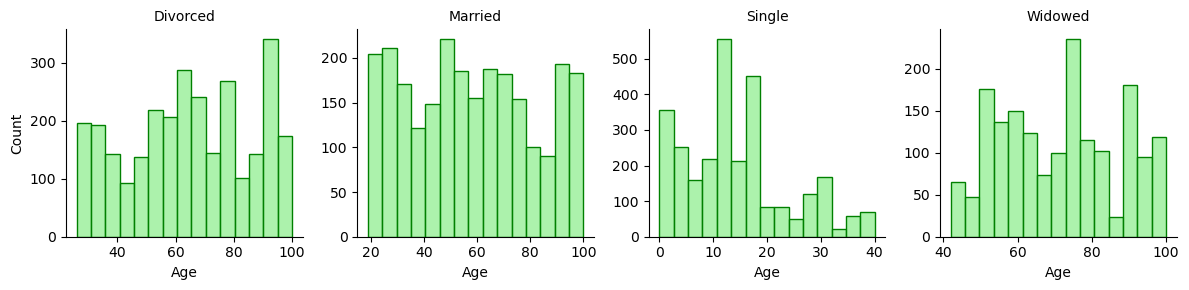

In [544]:

g = sns.FacetGrid(patient_data, col="Marital Status", col_wrap=4, height=3, sharex=False, sharey=False)

# Map a histogram to each subplot
g.map(sns.histplot, "Age", bins=15, color='lightgreen', edgecolor='green')

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Count")

plt.tight_layout()
plt.show()

**Correction of Marital Status for Minors**

During data inspection we found logical inconsistencies where patients under 18 were recorded as "Married" or "Widowed" (likely data‑entry errors). To correct these records while preserving the data, we set Marital Status = "Single" for all patients aged < 18.

##### Inconsistencies in `Satisfaction Level`

In [545]:
patient_data['Satisfaction Level'].value_counts()

Satisfaction Level
2    1890
4    1886
1    1865
3    1838
5    1802
6     719
Name: count, dtype: int64

In [546]:
patient_data.loc[patient_data['Satisfaction Level'] == 6, 'Satisfaction Level'] = 5
patient_data['Satisfaction Level'].value_counts()

Satisfaction Level
5    2521
2    1890
4    1886
1    1865
3    1838
Name: count, dtype: int64

Given that the standard satisfaction scale for this dataset ranges from 1 to 5, we identified entries with a value of 6 as data entry errors.

To maintain data consistency without discarding valid patient feedback, we decided to cap these outliers by converting all values of 6 to the maximum valid score of 5.

#### 1.5.2 Inconsistencies and Outliers

##### Inconsistencies in `Consultation Duration` and `Consultation Price`

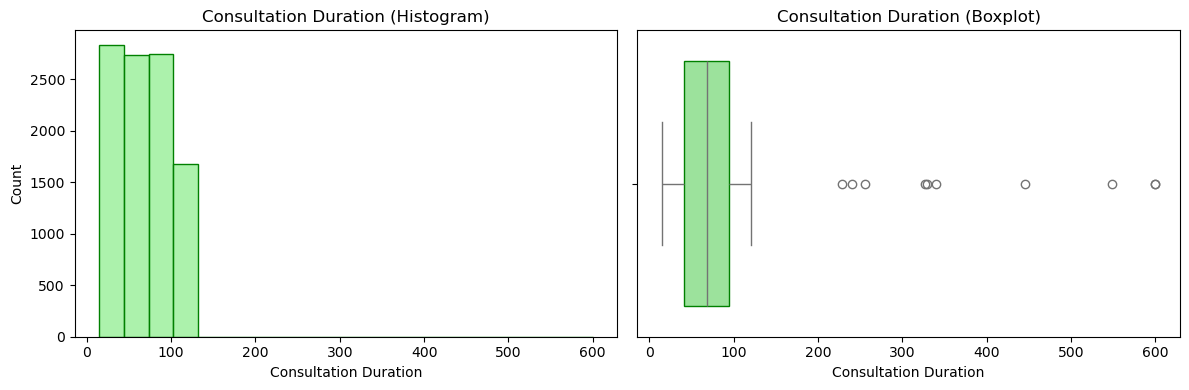

In [547]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(patient_data['Consultation Duration'], bins=20, color='lightgreen', edgecolor='green', ax=axes[0])
axes[0].set_title('Consultation Duration (Histogram)')
axes[0].set_xlabel('Consultation Duration')
axes[0].set_ylabel('Count')

# Boxplot
sns.boxplot(x=patient_data['Consultation Duration'], color='lightgreen', boxprops=dict(edgecolor='green'), ax=axes[1])
axes[1].set_title('Consultation Duration (Boxplot)')
axes[1].set_xlabel('Consultation Duration')

plt.tight_layout()
plt.show()

In [548]:
patient_data.loc[patient_data['Consultation Duration'] > 200, 'Consultation Price']

Patient ID
1273    178.270432
1270    155.570312
1024    263.681580
1478    308.522491
1450    282.265747
1357    299.962555
1077    229.328583
1009    158.730042
1497    295.931030
1490    219.041107
Name: Consultation Price, dtype: float32

We identified significant outliers in the `Consultation Duration` variable, with some sessions recorded as lasting up to 10 hours (600 minutes).

However, a cross-check with Consultation Price revealed that these "long" sessions cost approximately 150, which is inconsistent with the high cost expected for such extended medical procedures. This discrepancy strongly suggests these extreme durations are data entry errors rather than genuine clinical events.

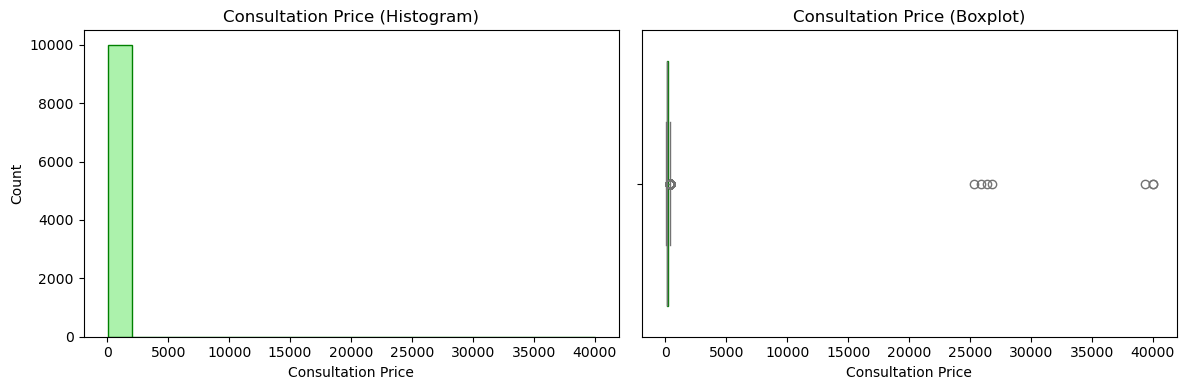

In [549]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(patient_data['Consultation Price'], bins=20, color='lightgreen', edgecolor='green', ax=axes[0])
axes[0].set_title('Consultation Price (Histogram)')
axes[0].set_xlabel('Consultation Price')
axes[0].set_ylabel('Count')

# Boxplot
sns.boxplot(x=patient_data['Consultation Price'], color='lightgreen', boxprops=dict(edgecolor='green'), ax=axes[1])
axes[1].set_title('Consultation Price (Boxplot)')
axes[1].set_xlabel('Consultation Price')

plt.tight_layout()
plt.show()

We identified significant outliers in the `Consultation Price` variable, with some sessions recorded as costing up to 40,000.

However, a cross-check with Consultation Duration revealed that these "expensive" sessions often had standard durations (e.g., roughly 60 minutes), which is inconsistent with the astronomical cost recorded. This discrepancy strongly suggests these extreme prices are data entry errors (likely missing decimal points) rather than genuine fees for complex procedures.

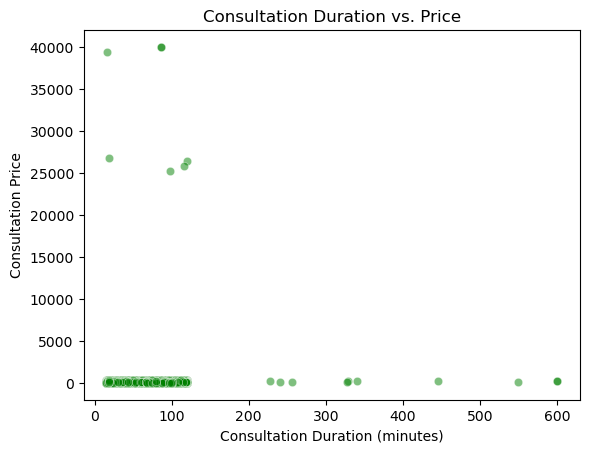

In [550]:
sns.scatterplot(
    data=patient_data,
    x='Consultation Duration',
    y='Consultation Price',
    alpha=0.5, color='green'
)
plt.title('Consultation Duration vs. Price')
plt.xlabel('Consultation Duration (minutes)')
plt.ylabel('Consultation Price')
plt.show()

Capping Outliers

In [551]:
# Handle outliers in Consultation Duration similarly to Consultation Price
duration_cap = patient_data['Consultation Duration'].quantile(0.99)
print(f"99th Percentile Cap (Duration): {duration_cap:.0f} minutes")

# Count rows above this cap
outliers_mask_duration = patient_data['Consultation Duration'] > duration_cap
print(f"Number of rows with Duration > {duration_cap:.0f}: {outliers_mask_duration.sum()}")

# Compute median of non-outliers and impute
valid_median_duration = patient_data.loc[~outliers_mask_duration, 'Consultation Duration'].median()
print(f"Imputing duration outliers with valid median: {valid_median_duration:.0f} minutes")

patient_data.loc[outliers_mask_duration, 'Consultation Duration'] = int(valid_median_duration)

# Verify
print(f"New Max Duration: {patient_data['Consultation Duration'].max():.0f} minutes")

99th Percentile Cap (Duration): 119 minutes
Number of rows with Duration > 119: 88
Imputing duration outliers with valid median: 67 minutes
New Max Duration: 119 minutes


In [552]:
price_cap = patient_data['Consultation Price'].quantile(0.99)
print(f"99th Percentile Cap: {price_cap:.2f}")

# 2. Check how many rows are above this cap
outliers_mask = patient_data['Consultation Price'] > price_cap
print(f"Number of rows with Price > {price_cap:.2f}: {outliers_mask.sum()}")

# 3. Apply the Fix: Replace outliers with the median
# (Alternatively, you could replace them with the 'price_cap' value itself)
valid_median = patient_data.loc[~outliers_mask, 'Consultation Price'].median()
print(f"Imputing price outliers with valid median: {valid_median:.2f}")

patient_data.loc[outliers_mask, 'Consultation Price'] = valid_median

# 4. Verify
print(f"New Max Price: {patient_data['Consultation Price'].max():.2f}")

99th Percentile Cap: 374.25
Number of rows with Price > 374.25: 100
Imputing price outliers with valid median: 158.85
New Max Price: 374.25


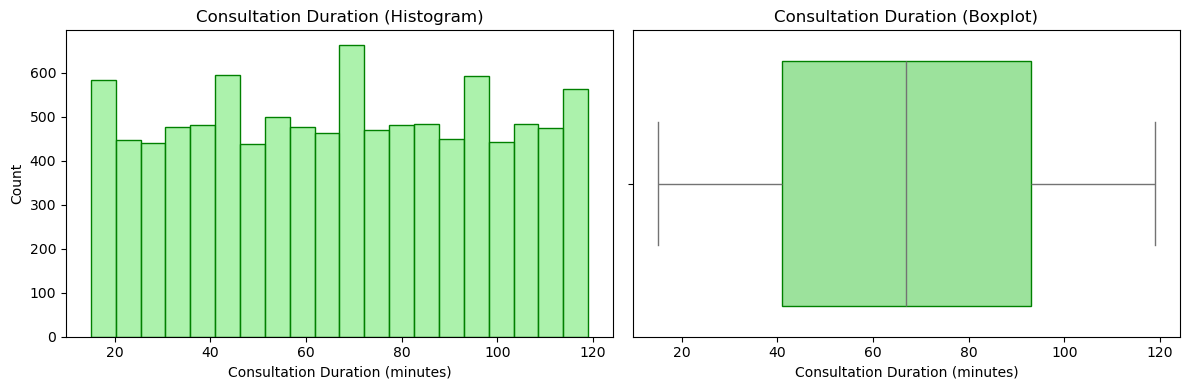

In [553]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(patient_data['Consultation Duration'], bins=20, color='lightgreen', edgecolor='green', ax=axes[0])
axes[0].set_title('Consultation Duration (Histogram)')
axes[0].set_xlabel('Consultation Duration (minutes)')
axes[0].set_ylabel('Count')

sns.boxplot(x=patient_data['Consultation Duration'], color='lightgreen', boxprops=dict(edgecolor='green'), ax=axes[1])
axes[1].set_title('Consultation Duration (Boxplot)')
axes[1].set_xlabel('Consultation Duration (minutes)')

plt.tight_layout()
plt.show()

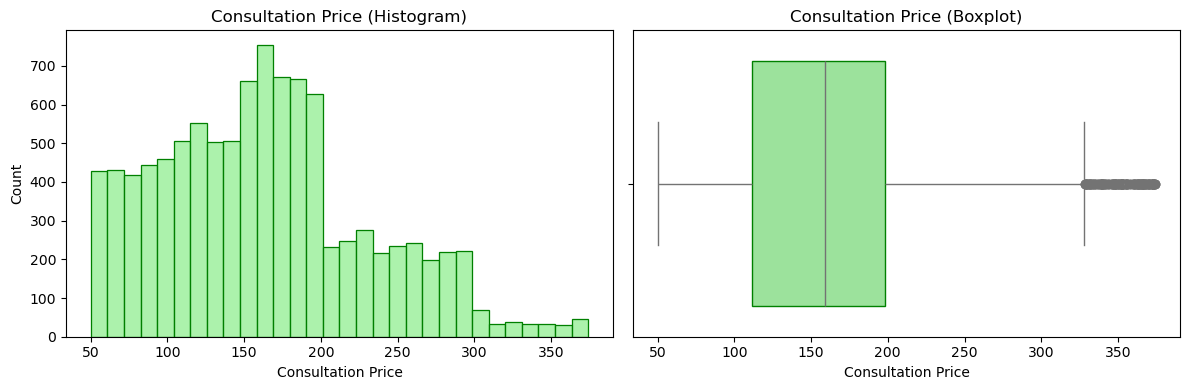

In [554]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(patient_data['Consultation Price'], bins=30, color='lightgreen', edgecolor='green', ax=axes[0])
axes[0].set_title('Consultation Price (Histogram)')
axes[0].set_xlabel('Consultation Price')
axes[0].set_ylabel('Count')

sns.boxplot(x=patient_data['Consultation Price'], color='lightgreen', boxprops=dict(edgecolor='green'), ax=axes[1])
axes[1].set_title('Consultation Price (Boxplot)')
axes[1].set_xlabel('Consultation Price')

plt.tight_layout()
plt.show()

**Handling Outliers: Price & Duration**

To address the extreme inconsistencies found in `Consultation Price` (~$40,000) and `Consultation Duration` (10 hours), which were confirmed as errors via cross-validation, we applied outlier Capping

* Duration: Values above the 99th percentile (119 minutes) were considered outliers and replaced with the median (67 minutes).

* Price: Values above the 99th percentile were replaced with the median.

We decided to implement this strategy specifically to prepare the data for future manipulation and advanced analytics, such as clustering algorithms. Extreme outliers can disproportionately influence distance calculations in these models, so normalizing these values now ensures more accurate and robust segmentation results

In [555]:
patient_data.to_excel('part A.xlsx')

##  2. Feature Engineering & ABT Construction (Part B)

In [556]:
cleaned_data=pd.read_excel('part A.xlsx')
cleaned_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65,Female,Birmingham,Retired,No provider,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839,293.014038,0.0
1,1482,65,Female,Birmingham,Retired,No provider,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219,287.208984,0.0
2,1482,65,Female,Birmingham,Retired,No provider,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491,241.254501,0.0
3,1482,65,Female,Birmingham,Retired,No provider,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944,221.177490,0.0
4,1482,65,Female,Birmingham,Retired,No provider,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248,219.743790,0.0


In [557]:
cleaned_data['Patient ID'].value_counts() #lenght=500 meaning we have 500 unique id

Patient ID
1481    39
1433    35
1304    35
1340    34
1012    32
        ..
1379    10
1298    10
1317    10
1278    10
1057     9
Name: count, Length: 500, dtype: int64

### 2.1 Demographic variables

We decided to start the ABT table with only the demographic variables: `Age`, `Gender`, `City of Residence`, `Profession`, `Education Level`, `Marital Status`, `Approximate Annual Income`, `Family History`, and `Insurance Provider`.

In [558]:
agg_rules = {
    # Static columns: take the 'first' value found
    'Age': 'first',
    'Gender': 'first',
    'City of Residence': 'first',
    'Profession': 'first',
    'Education Level': 'first',
    'Marital Status': 'first',
    'Approximate Annual Income': 'mean', # Mean is safer for income
    'Family History': 'first',
    'Insurance Provider': 'first'}

# Perform the GroupBy
abt_demo = cleaned_data.groupby('Patient ID').agg(agg_rules)

abt_demo

,Age,Gender,City of Residence,Profession,Education Level,Marital Status,Approximate Annual Income,Family History,Insurance Provider
Patient ID,,,,,,,,,
1000,63,Female,Birmingham,Artist,Undergraduate,Divorced,43667.250000,Hypertension,Provider D
1001,55,Male,Liverpool,Lawyer,Undergraduate,Married,44214.437500,Heart Disease,Provider C
1002,10,Female,Liverpool,Student,Elementary school,Single,0.000000,Cancer,Provider C
1003,91,Male,Manchester,Retired,Master,Married,43006.360000,Cancer,Provider A
1004,11,Male,Glasgow,Student,Middle school/junior high,Single,0.000000,Cancer,Provider B
...,...,...,...,...,...,...,...,...,...
1495,23,Other,Glasgow,Businessperson,Undergraduate,Single,46714.428571,Heart Disease,Provider D
1496,4,Other,Belfast,Student,Pre-school,Single,0.000000,Hypertension,Provider B
1497,69,Other,Dublin,Retired,Undergraduate,Married,45372.153846,Cancer,Provider D


### 2.2 Visit Aggregated Behavior variables

To capture the patient's history and resource consumption, we calculated the following aggregated metrics based on their visits:

`Visit`: The total count of visits for each patient (Frequency).

`Total_time`: The sum of minutes spent in consultations across all visits.

`Avg_Duration`: The average duration (in minutes) of the patient's consultations.

`Total_spent`: The total monetary value charged across all visits.

`Avg_price`: The average price per consultation.

In [559]:
# aggregate per-patient visit counts, total consultation time and total spent (price - coverage)
agg = (
    cleaned_data
    .groupby('Patient ID')
    .agg(Visit=('Patient ID', 'count'),
         Total_time=('Consultation Duration', 'sum'),
         Avg_Duration=('Consultation Duration', 'mean'),
         Total_spent=('Consultation Price', 'sum'),
         Avg_price=('Consultation Price', 'mean'))
)

# Initialize abt from abt_demo, then join aggregates
abt = abt_demo.copy()
abt = abt.join(agg, how='left')

abt['Visit'] = abt['Visit'].astype(int)
abt['Total_time'] = abt['Total_time'].astype(int)
abt['Total_spent'] = abt['Total_spent'].astype(float)


# show the updated table head
abt.head()

,Age,Gender,City of Residence,Profession,Education Level,Marital Status,Approximate Annual Income,Family History,Insurance Provider,Visit,Total_time,Avg_Duration,Total_spent,Avg_price
Patient ID,,,,,,,,,,,,,,
1000,63,Female,Birmingham,Artist,Undergraduate,Divorced,43667.2500,Hypertension,Provider D,20,1314,65.700000,3281.664009,164.083200
1001,55,Male,Liverpool,Lawyer,Undergraduate,Married,44214.4375,Heart Disease,Provider C,16,968,60.500000,2396.985832,149.811615
1002,10,Female,Liverpool,Student,Elementary school,Single,0.0000,Cancer,Provider C,18,1279,71.055556,2919.254807,162.180823
1003,91,Male,Manchester,Retired,Master,Married,43006.3600,Cancer,Provider A,25,1535,61.400000,4268.127033,170.725081
1004,11,Male,Glasgow,Student,Middle school/junior high,Single,0.0000,Cancer,Provider B,26,1629,62.653846,4486.142654,172.543948


### 2.3 Clinical Service Usage variables

To understand the breadth of care and specific medical needs, we created the following features:

`Department_Variety`: The count of unique departments visited by the patient. A higher number indicates a patient with complex, multi-system medical needs, whereas a lower number suggests localized care.

`Departments`: A sorted text list of all unique departments visited (e.g., "Cardiology, Neurology"). This allows for pattern mining to identify common comorbidities or patient pathways.

`Avg_Satisfaction`: The average satisfaction rating given by the patient across all visits (scale 1-5), rounded to one decimal place. This metric serves as a proxy for the quality of the clinical experience.

In [560]:
# Calculate department variety and list of departments per patient
dept_agg = (
    cleaned_data.groupby('Patient ID')['Department']
    .agg(Department_Variety='nunique', Departments=lambda x: ', '.join(sorted(x.unique())))
)

# Join to abt
abt = abt.join(dept_agg, how='left')

abt.head()

,Age,Gender,City of Residence,Profession,Education Level,Marital Status,Approximate Annual Income,Family History,Insurance Provider,Visit,Total_time,Avg_Duration,Total_spent,Avg_price,Department_Variety,Departments
Patient ID,,,,,,,,,,,,,,,,
1000,63,Female,Birmingham,Artist,Undergraduate,Divorced,43667.2500,Hypertension,Provider D,20,1314,65.700000,3281.664009,164.083200,10,"Allergology, Cardiology, Dermatology, ENT, Eme..."
1001,55,Male,Liverpool,Lawyer,Undergraduate,Married,44214.4375,Heart Disease,Provider C,16,968,60.500000,2396.985832,149.811615,10,"Allergology, Cardiology, ENT, Emergency, Endoc..."
1002,10,Female,Liverpool,Student,Elementary school,Single,0.0000,Cancer,Provider C,18,1279,71.055556,2919.254807,162.180823,10,"Allergology, Dermatology, ENT, Gastroenterolog..."
1003,91,Male,Manchester,Retired,Master,Married,43006.3600,Cancer,Provider A,25,1535,61.400000,4268.127033,170.725081,11,"Allergology, ENT, Emergency, Endocrinology, Ga..."
1004,11,Male,Glasgow,Student,Middle school/junior high,Single,0.0000,Cancer,Provider B,26,1629,62.653846,4486.142654,172.543948,9,"Allergology, Cardiology, Emergency, Endocrinol..."


In [561]:
# Calculate Recency: days since last visit
last_visit = cleaned_data.groupby('Patient ID')['Visit Date'].max()
abt['Recency'] = (pd.Timestamp('2024-12-31') - last_visit).dt.days

# Calculate Activity: average visits per year
abt['Visit_Start_Date'] = cleaned_data.groupby('Patient ID')['Visit Date'].min()
abt['Visit_End_Date'] = last_visit
abt['Years_Active'] = ((abt['Visit_End_Date'] - abt['Visit_Start_Date']).dt.days / 365.25).clip(lower=0.25)
abt['Activity'] = (abt['Visit'] / abt['Years_Active']).round(1)

# Clean up temporary columns
abt = abt.drop(['Visit_Start_Date', 'Visit_End_Date', 'Years_Active'], axis=1)

abt.head()

,Age,Gender,City of Residence,Profession,Education Level,Marital Status,Approximate Annual Income,Family History,Insurance Provider,Visit,Total_time,Avg_Duration,Total_spent,Avg_price,Department_Variety,Departments,Recency,Activity
Patient ID,,,,,,,,,,,,,,,,,,
1000,63,Female,Birmingham,Artist,Undergraduate,Divorced,43667.2500,Hypertension,Provider D,20,1314,65.700000,3281.664009,164.083200,10,"Allergology, Cardiology, Dermatology, ENT, Eme...",187,41.0
1001,55,Male,Liverpool,Lawyer,Undergraduate,Married,44214.4375,Heart Disease,Provider C,16,968,60.500000,2396.985832,149.811615,10,"Allergology, Cardiology, ENT, Emergency, Endoc...",187,33.0
1002,10,Female,Liverpool,Student,Elementary school,Single,0.0000,Cancer,Provider C,18,1279,71.055556,2919.254807,162.180823,10,"Allergology, Dermatology, ENT, Gastroenterolog...",191,38.9
1003,91,Male,Manchester,Retired,Master,Married,43006.3600,Cancer,Provider A,25,1535,61.400000,4268.127033,170.725081,11,"Allergology, ENT, Emergency, Endocrinology, Ga...",185,51.3
1004,11,Male,Glasgow,Student,Middle school/junior high,Single,0.0000,Cancer,Provider B,26,1629,62.653846,4486.142654,172.543948,9,"Allergology, Cardiology, Emergency, Endocrinol...",186,53.1


### 2.4 Engagement variables

To quantify patient retention and distinguish between consistently loyal patients and those who are "lapsed" or "one-time" visitors, we engineered two specific engagement features:

`Recency`: The number of days elapsed between the patient's last visit and the reference date of December 31, 2024. Lower values indicate active patients, while higher values indicate lapsed patients.

`Activity`: A normalized measure of engagement intensity, calculated as the average number of visits per year.

(Formula: Total Visits / Years Active)

Note: "Years Active" is the duration between the first and last visit (clipped at a minimum of 0.25 years to prevent division errors for single-visit patients).

In [562]:
# calculate average satisfaction per patient and add to abt
avg_sat = cleaned_data.groupby('Patient ID')['Satisfaction Level'].mean().round(1)
abt = abt.join(avg_sat.rename('Avg_Satisfaction'), how='left')

# ensure numeric dtype and display result
abt['Avg_Satisfaction'] = abt['Avg_Satisfaction'].astype(float)
abt.head()

,Age,Gender,City of Residence,Profession,Education Level,Marital Status,Approximate Annual Income,Family History,Insurance Provider,Visit,Total_time,Avg_Duration,Total_spent,Avg_price,Department_Variety,Departments,Recency,Activity,Avg_Satisfaction
Patient ID,,,,,,,,,,,,,,,,,,,
1000,63,Female,Birmingham,Artist,Undergraduate,Divorced,43667.2500,Hypertension,Provider D,20,1314,65.700000,3281.664009,164.083200,10,"Allergology, Cardiology, Dermatology, ENT, Eme...",187,41.0,2.6
1001,55,Male,Liverpool,Lawyer,Undergraduate,Married,44214.4375,Heart Disease,Provider C,16,968,60.500000,2396.985832,149.811615,10,"Allergology, Cardiology, ENT, Emergency, Endoc...",187,33.0,3.2
1002,10,Female,Liverpool,Student,Elementary school,Single,0.0000,Cancer,Provider C,18,1279,71.055556,2919.254807,162.180823,10,"Allergology, Dermatology, ENT, Gastroenterolog...",191,38.9,3.4
1003,91,Male,Manchester,Retired,Master,Married,43006.3600,Cancer,Provider A,25,1535,61.400000,4268.127033,170.725081,11,"Allergology, ENT, Emergency, Endocrinology, Ga...",185,51.3,3.2
1004,11,Male,Glasgow,Student,Middle school/junior high,Single,0.0000,Cancer,Provider B,26,1629,62.653846,4486.142654,172.543948,9,"Allergology, Cardiology, Emergency, Endocrinol...",186,53.1,3.3


In [563]:
# Save the ABT to a CSV file (index=True ensures 'Patient ID' is kept if it's the index)
abt.to_csv('ABT_City_Hospital.csv', index=True)

#### Conclusion: Feature Engineering & ABT Construction

In Part B, we successfully transformed the cleaned transactional data into a patient-centric *Analytical Base Table (ABT)*.

By aggregating over 10,000 visit records, we constructed a robust dataset containing 500 unique patients (one row per patient). The final ABT is structured into four logical sections:

* `Demographics`: Static profiles (e.g., Age, Profession).

* `Behavior`: Interaction volume and value (e.g., Total Spend, Frequency).

* `Clinical Usage`: Service complexity (e.g., Department Variety).

* `Engagement`: Activity metrics (e.g., Recency).

This structured dataset is now fully prepared for Part C, where we will extract insights through exploratory visualization and clustering analysis.